In [1]:
!pip install pandas
import pickle as pkl
import os
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import numpy as np
#%% 
import getpass
import sys
import pickle
import xarray as xr

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


/usr/local/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [5]:
user=getpass.getuser()
print(user)
if user=='eghbalhosseini':
    analysis_dir='/Users/eghbalhosseini/MyData/neural_nlp_arch/analysis/head/'
    result_dir='/Users/eghbalhosseini/.result_caching/neural_nlp.score/arch_search_20201118/'
elif user=='ehoseini':
    analysis_dir='/om/user/ehoseini/MyData/neural_nlp_arch/analysis/head/'
    result_dir='/om/user/ehoseini/.result_caching/neural_nlp.score/arch_search_20201118/'
if not os.path.exists(analysis_dir):
    os.mkdir(analysis_dir)

ehoseini


#  head ablation results

In [ ]:
for train in ['','-untrained']:
    for ablate_type in ['_static']:
        for n_ablate in [3,6,9]:

            benchmark='Pereira2018-encoding'

            model_seq=['None']
            [model_seq.append(str(x)) for x in range(12)]
            model_seq.append('all')

            model_perf=[]
            for i, x in enumerate(model_seq):
                model=f"arch_gpt2_head{ablate_type}_L_{x}_H_{n_ablate}{train}"
                model_file='benchmark='+benchmark+',model='+model+',subsample=None.pkl'
                res_=pd.read_pickle(os.path.join(result_dir,model_file))
                res_=res_['data']
                model_perf.append(res_.values)
                print(model_file)
    
            model_base=f"arch_gpt2_head{ablate_type}_L_{model_seq[0]}_H_{n_ablate[0]}{train[0]}"
            base_file='benchmark='+benchmark+',model='+model_base+',subsample=None.pkl'
            res_base=pd.read_pickle(os.path.join(result_dir,base_file))
            res_base=res_base['data']
            x_val=res_base.coords['layer'].values;
            r3 = np.arange(len(x_val))
            y_perform=[]
            for idx,ys in enumerate(model_perf):
                y_perform.append(ys[:,0])
            fig = plt.figure(figsize=[10,10])
            ax = fig.add_axes([.05,.05,.85,.85])
                #plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
            if train=='-untrained':
                v_max_val=0.65
            else:
                v_max_val=.9
            
            plt.imshow(y_perform,vmin=-0.05,vmax=v_max_val)
            plt.xticks(r3,x_val,rotation=45)
            plt.yticks(np.arange(len(y_perform)),model_seq,rotation=0)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            plt.colorbar()
            saving_name=res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig2_performance_of_all_models_no_val.png'
            saving_name = saving_name.translate(str.maketrans({'[': '', ']': '', '/': '_'}))
            ax.set_title(saving_name)
            fig.savefig(os.path.join(analysis_dir,saving_name))


In [6]:
model_seq=[]
[model_seq.append(str(x)) for x in range(12)]
benchmark='Pereira2018-encoding'
model_base=f"arch_gpt2_head_static_L_None_H_3"
base_file='benchmark='+benchmark+',model='+model_base+',subsample=None.pkl'
res_base=pd.read_pickle(os.path.join(result_dir,base_file))
res_base=res_base['data']
x_val=res_base.coords['layer'].values
r3 = np.arange(len(x_val))

Loading lookup from /usr/local/lib/python3.7/site-packages/brainio_collection/lookup.csv


In [13]:
model_seq

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [14]:
y_drop=np.stack(res_base.values[:,0])
y_drop[:]=np.nan
y_drops=[]
y_abss=[]
y_drops.append(y_drop)
y_abss.append(np.stack(res_base.values[:,0]))
x_label=['none']
for train in ['',]:
    for ablate_type in ['_static']:
        for i, x in enumerate(model_seq):
            model_perf=[]
            for n_ablate in [3,6,9]:
                model=f"arch_gpt2_head{ablate_type}_L_{x}_H_{n_ablate}{train}"
                model_file='benchmark='+benchmark+',model='+model+',subsample=None.pkl'
                res_=pd.read_pickle(os.path.join(result_dir,model_file))
                res_=res_['data']
                model_perf.append(res_.values[:,0])
                print(model_file)
            
            y_drop=np.mean(np.stack(model_perf),axis=0)-res_base.values[:,0]
            y_abs=np.mean(np.stack(model_perf),axis=0)
            #y_drop[0:i-1]=np.nan
            y_drops.append(y_drop)
            y_abss.append(y_abs)
            x_label.append(str(x))
            #for idx,ys in enumerate(model_perf):
            #    y_perform.append(ys[:,0])
            #fig = plt.figure(figsize=[10,10])
            #ax = fig.add_axes([.05,.05,.85,.85])
                #plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
            #if train=='-untrained':
            #    v_max_val=0.65
            #else:
            #    v_max_val=.9
            
            #plt.imshow(y_perform,vmin=-0.05,vmax=v_max_val)
            #plt.xticks(r3,x_val,rotation=45)
            #plt.yticks(np.arange(len(y_perform)),model_seq,rotation=0)
            #ax.spines["top"].set_visible(False)
            #ax.spines["right"].set_visible(False)
            #plt.colorbar()
            #saving_name=res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig2_performance_of_all_models_no_val.png'
            #saving_name = saving_name.translate(str.maketrans({'[': '', ']': '', '/': '_'}))
            #ax.set_title(saving_name)
            #fig.savefig(os.path.join(analysis_dir,saving_name))

benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_0_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_0_H_6,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_0_H_9,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_1_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_1_H_6,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_1_H_9,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_2_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_2_H_6,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_2_H_9,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_3_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_3_H_6,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_st

In [17]:
len(x_label)

13

In [16]:
len(y_abss)

13

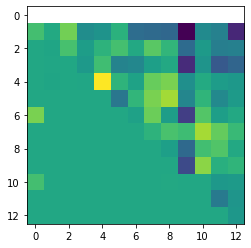

In [163]:
plt.imshow(y_drops)

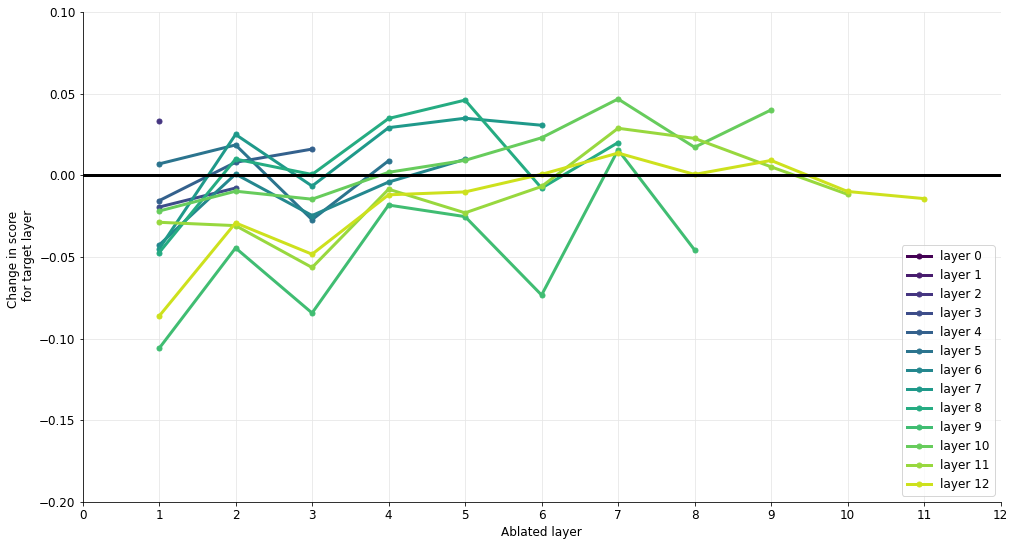

In [166]:
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(len(model_seq)+1),len(model_seq)+1))
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.05,.05,.85,.85])
y=np.stack(y_drops)
for i in range(y.shape[1]):
    ax.plot(r3[:i],y[0:i,i],linewidth=3,color=all_col[i,:],label=f"layer {i}",marker='.',markersize=10)
ax.axhline(y=0,xmin=0,xmax=len(model_seq),color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim([-.2,.1])
plt.grid(True, which="both",ls="-", color='0.9')
leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(12)
    
ax.set_xlabel('Ablated layer')
ax.set_xticks(np.arange(y.shape[0]))
ax.set_ylabel('Change in score \n for target layer')
saving_name=res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_change_in_target_layer_performance.png'
saving_name = saving_name.translate(str.maketrans({'[': '', ']': '', '/': '_'}))
fig.savefig(os.path.join(analysis_dir,saving_name))

Text(0, 0.5, 'Change in score \n for target layer')

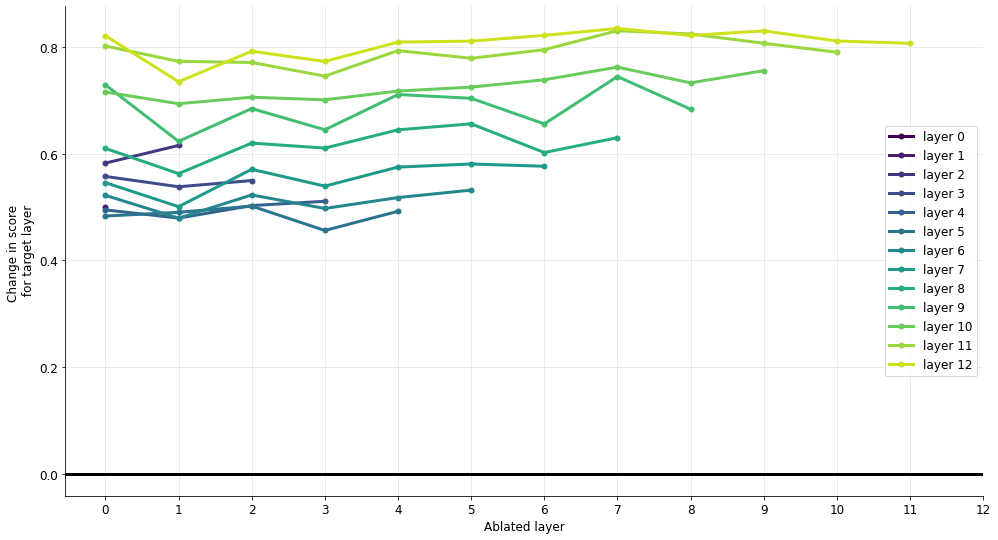

In [10]:
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(len(model_seq)+1),len(model_seq)+1))
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.05,.05,.85,.85])
y=np.stack(y_abss)
for i in range(y.shape[1]):
    ax.plot(r3[:i],y[0:i,i],linewidth=3,color=all_col[i,:],label=f"layer {i}",marker='.',markersize=10)
ax.axhline(y=0,xmin=0,xmax=len(model_seq),color='k',linewidth=3)  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set_ylim([-.2,.1])
plt.grid(True, which="both",ls="-", color='0.9')
leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(12)
    
ax.set_xlabel('Ablated layer')
ax.set_xticks(np.arange(y.shape[0]))
ax.set_ylabel('Change in score \n for target layer')
#saving_name=res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_change_in_target_layer_performance.png'
#saving_name = saving_name.translate(str.maketrans({'[': '', ']': '', '/': '_'}))
#fig.savefig(os.path.join(analysis_dir,saving_name))

In [12]:
ax.set_xticks(np.arange(y.shape[0]))

<xarray.Score (layer: 13, aggregation: 2)>
array([[-0.033482,  0.062408],
       [ 0.499806,  0.103656],
       [ 0.582807,  0.062552],
       [ 0.557768,  0.060554],
       [ 0.494991,  0.106454],
       [ 0.483381,  0.165288],
       [ 0.52218 ,  0.149787],
       [ 0.546059,  0.181453],
       [ 0.610358,  0.148835],
       [ 0.729656,  0.162201],
       [ 0.716134,  0.086644],
       [ 0.802464,  0.16265 ],
       [ 0.821845,  0.164581]])
Coordinates:
  * layer        (layer) object 'drop' 'encoder.h.0' ... 'encoder.h.11'
  * aggregation  (aggregation) <U6 'center' 'error'
Attributes:
    raw:          <xarray.Score (layer: 13, aggregation: 2)>\narray([[-0.0106...
    ceiling:      <xarray.Score (aggregation: 3)>\narray([0.318567, 0.012958,...
    description:  ceiling-normalized score
    model:        arch/gpt2/head_static/L_None/H_3
    benchmark:    Pereira2018-encoding

## make line plots 

benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_None_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_0_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_1_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_2_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_3_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_4_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_5_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_6_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_7_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_8_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head_static_L_9_H_3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=arch_gpt2_head

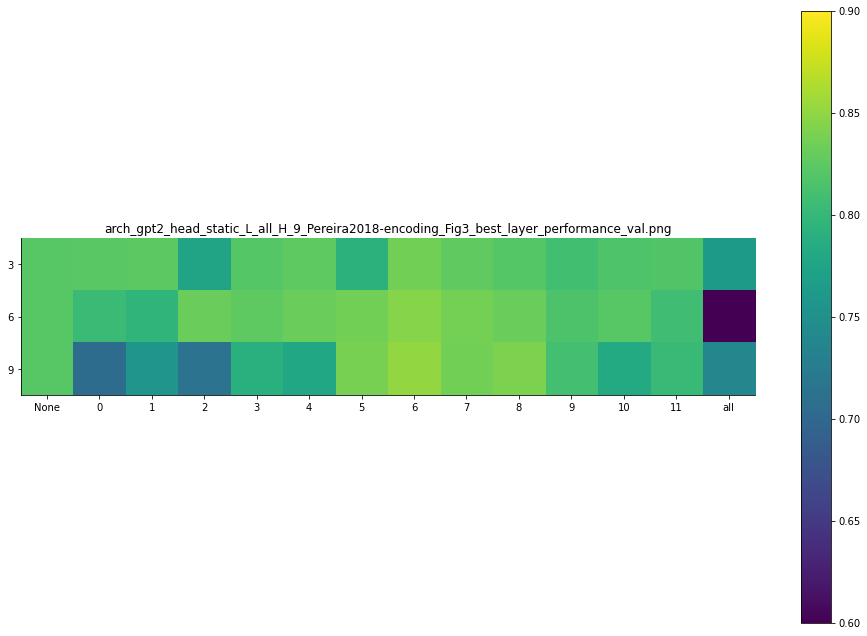

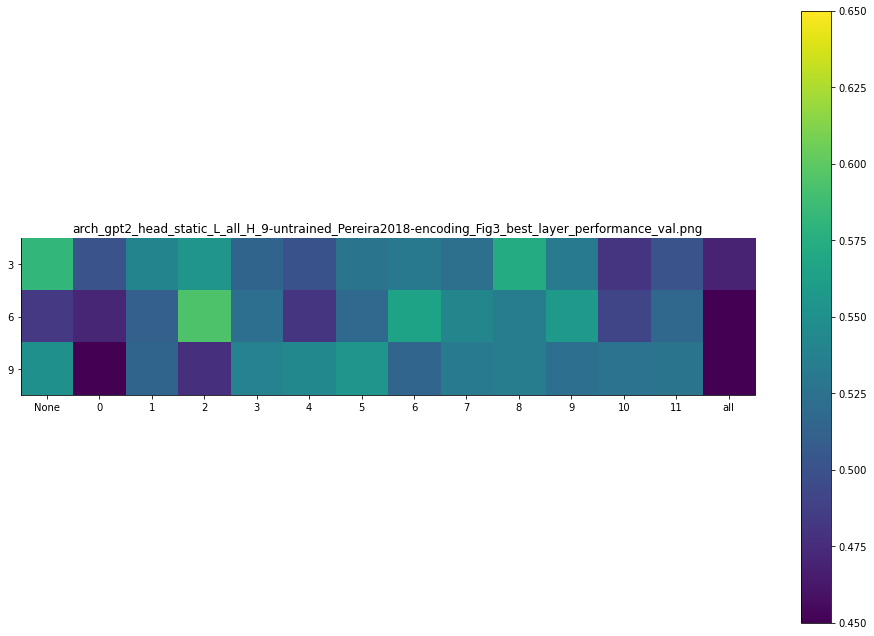

In [15]:
for train in ['','-untrained']:
    for ablate_type in ['_static']:
        benchmark='Pereira2018-encoding'
        num_head_ablate=[3,6,9]
        model_seq=['None']
        [model_seq.append(str(x)) for x in range(12)]
        model_seq.append('all')

        all_model_score=[]
        for p, q in enumerate(num_head_ablate):
            model_perf=[]
            for i, x in enumerate(model_seq):
                model=f"arch_gpt2_head{ablate_type}_L_{x}_H_{q}{train}"
                model_file='benchmark='+benchmark+',model='+model+',subsample=None.pkl'
                res_=pd.read_pickle(os.path.join(result_dir,model_file))
                res_=res_['data']
                model_perf.append(res_.values)
                print(model_file)
            all_model_score.append(model_perf)
        y_perform=[]
        y_perform_idx=[]
        for idx,ys in enumerate(all_model_score):
            y_perform.append([max(x[:,0]) for x in ys])
            y_perform_idx.append([np.argmax(x[:,0]) for x in ys])

        fig = plt.figure(figsize=[15,10])
        ax = fig.add_axes([.05,.05,.85,.85])
        if train=='-untrained':
                v_max_val=0.65
                v_min_val=0.45
        else:
                v_max_val=0.9
                v_min_val=0.6
        plt.imshow(y_perform,vmin=v_min_val,vmax=v_max_val)
        plt.yticks(np.arange(len(num_head_ablate)),num_head_ablate)
        plt.xticks(np.arange(len(model_seq)),model_seq,rotation=0)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        y_perform=np.asarray(y_perform)
        #for i in range((y_perform).shape[0]):
        #    for j in range((y_perform).shape[1]):
        #        text = ax.text(j, i, y_perform_idx[i, j],
        #               ha="center", va="center", color="w")
        plt.colorbar()
        saving_name=res_.attrs['model']+'_'+res_.attrs['benchmark']+'_Fig3_best_layer_performance_val.png'
        saving_name = saving_name.translate(str.maketrans({'[': '', ']': '', '/': '_'}))
        ax.set_title(saving_name)
        fig.savefig(os.path.join(analysis_dir,saving_name))


[[12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
 [12, 12, 12, 12, 12, 12, 12, 11, 11, 12, 12, 12, 12, 12],
 [12, 11, 12, 12, 11, 12, 12, 11, 11, 12, 12, 12, 11, 12]]

In [ ]:
layer_results=[]
ablation_str=[]
model_seq=[]
[model_seq.append(str(x)) for x in range(12)]
for x in model_seq:
    layer_res=[]
    ablation=[]
    for train in ['','-untrained']:
        for ablate_type in ['_last','_first','_static']:
            for n_ablate in [3,6,9]:

                benchmark='Pereira2018-encoding'
                model=f"arch_gpt2_head{ablate_type}_L_{x}_H_{n_ablate}{train}"
                model_file='benchmark='+benchmark+',model='+model+',subsample=None.pkl'
                res_=pd.read_pickle(os.path.join(result_dir,model_file))
                res_=res_['data']
                layer_res.append(res_.values)
                print(model_file)
                ablation.append(f"{ablate_type}_L_{x}_H_{n_ablate}{train}")
    layer_results.append(layer_res)
    ablation_str.append(ablation)

            

In [ ]:
fig,axes =plt.subplots(nrows=len(layer_results),ncols=1,figsize=(18,15))
axes=axes.flatten()
for i, x in enumerate(layer_results):
    layer_perf=[]
    for y in x:
        layer_perf.append(y[i,:])
    axes[i].plot(np.stack(layer_perf)[:,0])
    np.stack(layer_perf)
    

In [ ]:
x